In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')

In [397]:
# Normalization
data = data_table.values
d_mean = data - np.mean(data)
d_std = np.std(data)
data = d_mean/d_std


In [398]:
X = data[:,:2]
y = data[:,2:]

In [399]:
def computeCost(x, y, w):
    m = y.shape[0]
    cost = 0
    cost = (1/(2*m))*np.sum(np.square(np.dot(x, w) - y))
    return cost

In [400]:
def plot_cost_graph(w, cost_history, title):
    plt.plot(np.arange(len(cost_history)), cost_history, lw=2)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    print('Parâmetros encontrados para o {:s}: {:s}'.format(title,str(w)))

In [427]:
#Gradient Descent
def gd(x, y, epoch, alpha):
    w = np.zeros((x.shape[1],1))    
    w = w.copy()
    cost_history = []
    for i in range(epoch+1):
        error = np.square((y - np.dot(x,w))**2)
        w += (alpha/y.size)*np.sum((x.T).dot(error))
        cost_history.append(computeCost(x,y,w))
    return w,cost_history

In [428]:
#Standard Gradient Descent
def sgd(x, y, epoch, alpha):
    w = np.zeros((x.shape[1],1))    
    w = w.copy()
    cost_history = []
    for i in range(epoch+1):
        error = y-np.dot(x,w)
        w += alpha*(x.T).dot(error)
        cost_history.append(computeCost(x,y,w))
    return w,cost_history

In [429]:
def ols(x,y):
    w = np.dot(np.linalg.pinv(x),y)
    return w

Parâmetros encontrados para o GD: [[-0.14537944]
 [-0.14537944]]


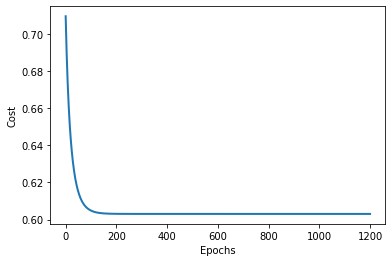

In [430]:
w, cost_history = gd(X, y, 1200, 0.01)
plot_cost_graph(w, cost_history, 'GD')

Parâmetros encontrados para o SGD: [[ 0.65263193]
 [-1.08374199]]


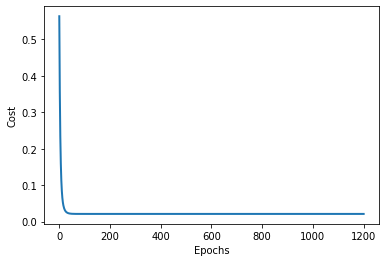

In [431]:
w, cost_history = sgd(X, y, 1200, 0.01)
plot_cost_graph(w, cost_history, 'SGD')

In [423]:
ols(X,y)

array([[ 0.65263193],
       [-1.08374199]])